# A baseline for multigraph square counts with 🍇 GRAPE 🍇
In this tutorial, I will show you how to use the [GRAPE library](https://github.com/AnacletoLAB/grape) to implement a very simple baseline algorithm to count the number of squares in a multi-graph.

I will explain the concept of a squares and the importance of square counting. By the end of the tutorial, you will have a good understanding of how to use [GRAPE](https://github.com/AnacletoLAB/grape) to implement your own algorithms, using how to count the squares in a multi-graph as an example.

We stress that this is a **not at all scalable baseline** to tackle a new problem.
To the best of my knowledge, no algorithm exists for counting squares in multi-graphs.
We are currently in the process of developing a scalable algorithm inspired by the work of [Oded Green and David Bader](https://davidbader.net/publication/2013-g-ba/2013-g-ba.pdf).

[Remember to ⭐ GRAPE!](https://github.com/AnacletoLAB/grape)

### What is GRAPE?
[🍇🍇 GRAPE 🍇🍇](https://github.com/AnacletoLAB/grape) is a graph processing and embedding library that enables users to easily manipulate and analyze graphs. With [GRAPE](https://github.com/AnacletoLAB/grape), users can efficiently load and preprocess graphs, generate random walks, and apply various node and edge embedding models. Additionally, [GRAPE](https://github.com/AnacletoLAB/grape) provides a fair and reproducible evaluation pipeline for comparing different graph embedding and graph-based prediction methods.

![features in GRAPE](https://github.com/AnacletoLAB/grape/raw/main/images/sequence_diagram.png?raw=true)

## Squares in graphs
In graph theory, **a square is a simple cycle of four unique vertices**. A triangle is also known as a 4-cycle.

A triangle can be represented by four vertices and the four edges connecting them. For example, in the following graph:

<img src="https://raw.githubusercontent.com/AnacletoLAB/grape/main/images/squares.png" width=200 />

There is one square, formed by vertices `1`, `2`, `3` and `4`. The square is represented by the four edges connecting these vertices: `(1,2)`, `(2,3)`, `(3, 4)`, and `(4,1)`.

### Why should you care about squares?
[Squares](https://mathworld.wolfram.com/SquareGraph.html) are an important concept in graph theory because they represent, as triangles, a basic unit of connectivity in a graph. In other words, the number of squares, analogously to the number of triangles, is a great measure of how well connected the vertices in a graph are to each other. 

Squares also have several applications in various fields, including social network analysis, machine learning, and data mining, such as the square clustering coefficient defined by [Pedro G. Lind et al.](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.72.056127).

In Category theory, squares in the diagrams implies [commutativity](https://en.wikipedia.org/wiki/Commutative_diagram):
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Commutative_square.svg/225px-Commutative_square.svg.png" width=200 />

### What is square counting?
The square count problem is the problem of counting the number of squares in a graph. It is a subproblem of more general cycle counting problems, such as counting the number of cycles of a given length in a graph.

To count the number of squares in a graph, one must first identify all of the squares in the graph. Once all of the squares in the graph have been identified, the total number of squares can be counted by simply adding up the number of squares identified by the algorithm.

<img src="https://raw.githubusercontent.com/AnacletoLAB/grape/main/images/squares_counting.png" width=500 />

#### Why should I count squares?
The square count problem has several applications in various fields, including social network analysis, machine learning, and data mining. In these fields, the number of square in a graph is often used as a measure of the graph's structure and connectivity, analogously to triangles. For example, in social network analysis, the number of squares in a person's social network can be used to measure the person's [squares_clustering coefficient](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.72.056127), which is a measure of how well connected the person is to their friends. In machine learning and data mining, the square count problem can be used to identify patterns and trends in large data sets, and can be used for tasks such as general graphs node embedding, i.e. not specific to a single graph.

### What is a multi-graph?
Unlike simple graphs, which only allow for a single edge between any given pair of vertices, multi-graphs permit multiple edges between the same pair of vertices. This makes multi-graphs particularly useful for modeling scenarios in which multiple relationships can exist between the same pair of elements, such as in social networks or transportation networks.

Most graph algorithms are primarely designed to work on [simple graph's](https://mathworld.wolfram.com/SimpleGraph.html), i.e. graphs that have at most one edge between any pair of nodes. The presence of multiple edges, often breaks the assumptions needed for these algorithms, and thus we must generalize them.

<img src="https://raw.githubusercontent.com/AnacletoLAB/grape/main/images/multigraph.png" width=400 />

## Installing GRAPE
First, we install the GRAPE library from PyPI:

In [1]:
!pip install grape -qU

### A baseline for multigraph square counts
The function takes a `Graph` object as input and returns an integer representing the number of squares in the multi-graph. This function is a generalization for multi-graph but, of course, also works for simple graphs.

The algorithm works by iterating through each pair $(v, w)$ of vertices $v, w \in V$ in the graph and checking their common neighbours $\mathcal{N}(v) \cap \mathcal{N}(w)$. If two vertices have common neighbours, the algorithm checks all possible combinations of the common neighbours to see if they form a square. This is done by computing the number of edges between each of the four nodes in the potential square. If there are edges between all four nodes, a square is counted for each possible path between them. The algorithm then divides the result by 2 to account for each square being counted twice (once for each pair of diagonal vertices).

It is simple to understand and implement, but it can be computationally expensive for large graphs, as it involves checking all pairs of vertices and their common neighbours. In the near future we are going to add to GRAPE a scalable version usable on much larger graphs!

In [2]:
import numpy as np
from grape import Graph

def get_number_of_squares_baseline_multigraph(graph: Graph) -> int:
    """Compute the number of squares in a multigraph using a baseline algorithm.
    
    Parameters
    ----------
    graph : Graph
        The multi-graph represented as a `Graph` object.

    Returns
    -------
    int
        The number of squares in the graph.
    """
    number_of_squares = 0
    # For each pair of nodes in the graph (possibly multi-graph)
    for first in range(graph.get_number_of_nodes()):
        first_neighbours = graph.get_neighbour_node_ids_from_node_id(first)
        # Check only the nodes bigger than the current one so we don't count
        # the same square twice
        for second in range(first + 1, graph.get_number_of_nodes()):
            second_neighbours = graph.get_neighbour_node_ids_from_node_id(second)
            
            # Compute the shared neighbours of the two nodes
            intersection = list(set(first_neighbours) & set(second_neighbours))
            
            # for each pair of shared neighbours
            for i, third in enumerate(intersection):
                for fourth in intersection[i+1:]:
                    # Add all the possible square between four nodes
                    # between each pair of nodes, we can choose any of
                    # the present edges, so the number is the product
                    # of how many edges we have!
                    number_of_squares += (
                        np.sum(first_neighbours == third) *
                        np.sum(second_neighbours == third) *
                        np.sum(first_neighbours == fourth) *
                        np.sum(second_neighbours == fourth)
                    )
                    
    # Divide by two because each square is counted twice, one for each
    # pair of diagonal nodes of the square 
    return number_of_squares / 2

### Testing our algorithm on random graphs using GRAPE
The purpose of the algorithm described in the previous section is to compute the number of squares present in a multi-graph. In this section, we will validate the correctness of the algorithm by generating random multi-graphs by merging two simple graphs and then manually verifying the correctness of the computed number of squares.

The process of generating a random multi-graph involves selecting two simple graphs and merging them by adding additional edges between pairs of nodes. The number of additional edges can be controlled to vary the density of the resulting multi-graph. After generating the multi-graph, it will be displayed visually to allow for manual verification of the number of squares present in the graph.

In [3]:
# ignore warning in plotting the random graphs, they are not related to our task.
import warnings
warnings.filterwarnings("ignore")

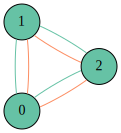

'The number of squares in the graph above is: 0.0'

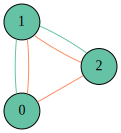

'The number of squares in the graph above is: 0.0'

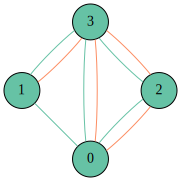

'The number of squares in the graph above is: 8.0'

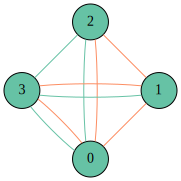

'The number of squares in the graph above is: 14.0'

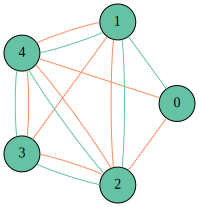

'The number of squares in the graph above is: 52.0'

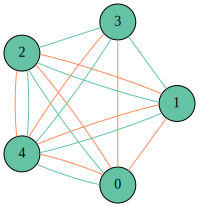

'The number of squares in the graph above is: 92.0'

In [4]:
from grape import GraphVisualizer
# Plot some graph with different n of nodes
for n_nodes in range(3, 6):
    for i in range(2):
        # Generate a multi-graph by merging two connected graphs
        # with different `edge_type`s
        g = (Graph.generate_random_connected_graph(
            random_state=i+1,
            nodes_number=n_nodes,
            edge_type="red"
        ) | Graph.generate_random_connected_graph(
            random_state=i+2,
            nodes_number=n_nodes,
            edge_type="blue"
        ))
        # plot the graph
        display(GraphVisualizer(g).plot_dot(engine="circo"))
        # Compute the squares
        display("The number of squares in the graph above is: %s"%get_number_of_squares_baseline_multigraph(g))

## Conclusions

In this tutorial, we learned how to use the [GRAPE](https://github.com/AnacletoLAB/grape) library to develop a custom algorithm, using as example the computation the exact number of squares in multi-graphs. We discussed what is a square, and why counting squares can be useful.

I hope you now have a better grasp on computing squares and how to use GRAPE to draft your custom algorithms. Do feel free to reach out with any questions or feedback, as I always look for ways to improve this tutorial.

Stay tuned for the scalable version we are developing 😸

[And remember to ⭐ GRAPE!](https://github.com/AnacletoLAB/grape)